In [8]:
# import libraries used for empirical analysis
import matplotlib.pyplot as plt
import numpy as np 
from timeit import Timer

# import alogrithms used in the project
from algo.kmp import kmpStringMatcher
from algo.naive import naiveStringMatcher
from algo.bmh import boyerMooreHorspoolStringMatcher

In [9]:
# open the dna sequence file and clean it by removing unnecessary lines and '\n' characters
fnaFile = open('DnaData/wuhan.fasta')
dnaSequence = ''.join(fnaFile.readlines()[1:])
dnaSequence = dnaSequence.replace('\n', '')

In [10]:
# we will be doing an empirical analysis by fixing the pattern to be searched 
# in this case, the pattern to be searched is 'TTTATACCTTCC'
# we will vary the length of the text which the pattern will need to be searched in 
# by splitting the DNA sequence string into 20 different lengths

# we will run the search process for 10 times for each length of text 
NUM_OF_TIMES = 10

#pattern = 'AACGGTATGCTG'
pattern = 'TTTATACCTTCC'

increment = len(dnaSequence) // 20
lengthsOfText = []
for i in range(1, 21):
    if i == 20:
        lengthsOfText.append(len(dnaSequence))
    else:
        lengthsOfText.append(i * increment)

In [11]:
# analysis for Naive (Brute-Force) algorithm

# run the search process for 10 times, then take the average, for each length of text
naiveExecutionTimes = []
for idx, length in enumerate(lengthsOfText):
    t = Timer(lambda: naiveStringMatcher(dnaSequence[:length], pattern)) 
    executionTime = t.timeit(number=NUM_OF_TIMES) / NUM_OF_TIMES
    
    print("Length of text: " + str(length) + ", Average Execution Time: " + str(executionTime))
    
    naiveExecutionTimes.append(executionTime)

Length of text: 1495, Average Execution Time: 0.000738312400005725
Length of text: 2990, Average Execution Time: 0.0014580656000021009
Length of text: 4485, Average Execution Time: 0.0017335233999915545
Length of text: 5980, Average Execution Time: 0.002032512899995709
Length of text: 7475, Average Execution Time: 0.0025412071999994625
Length of text: 8970, Average Execution Time: 0.0031486657000073135
Length of text: 10465, Average Execution Time: 0.003582187100005285
Length of text: 11960, Average Execution Time: 0.004235754299998007
Length of text: 13455, Average Execution Time: 0.004703127799996309
Length of text: 14950, Average Execution Time: 0.005387309900004311
Length of text: 16445, Average Execution Time: 0.005933881099997507
Length of text: 17940, Average Execution Time: 0.006569265500002075
Length of text: 19435, Average Execution Time: 0.007221244499999102
Length of text: 20930, Average Execution Time: 0.00764339890000656
Length of text: 22425, Average Execution Time: 0.00

In [12]:
# analysis for Knuth-Morris-Pratt (KMP) algorithm

# run the search process for 10 times, then take the average, for each length of text
kmpExecutionTimes = []
for idx, length in enumerate(lengthsOfText):
    t = Timer(lambda: kmpStringMatcher(dnaSequence[:length], pattern)) 
    executionTime = t.timeit(number=NUM_OF_TIMES) / NUM_OF_TIMES
    
    print("Length of text: " + str(length) + ", Average Execution Time: " + str(executionTime))
    
    kmpExecutionTimes.append(executionTime)

Length of text: 1495, Average Execution Time: 0.00046832530000529005
Length of text: 2990, Average Execution Time: 0.0008491130000038538
Length of text: 4485, Average Execution Time: 0.0011711988000001838
Length of text: 5980, Average Execution Time: 0.0013174198000001525
Length of text: 7475, Average Execution Time: 0.0017029449000006025
Length of text: 8970, Average Execution Time: 0.0018896465000011631
Length of text: 10465, Average Execution Time: 0.0021920071999943502
Length of text: 11960, Average Execution Time: 0.002612183200005802
Length of text: 13455, Average Execution Time: 0.0027815344000032384
Length of text: 14950, Average Execution Time: 0.0031510898999954407
Length of text: 16445, Average Execution Time: 0.003371936200005621
Length of text: 17940, Average Execution Time: 0.0036876895999967017
Length of text: 19435, Average Execution Time: 0.004144402999997965
Length of text: 20930, Average Execution Time: 0.004214056599994365
Length of text: 22425, Average Execution Ti

In [14]:
# analysis for Boyer-Moore-Horsepool (BMH) algorithm

# run the search process for 10 times, then take the average, for each length of text
bmhExecutionTimes = []
for idx, length in enumerate(lengthsOfText):
    t = Timer(lambda: boyerMooreHorspoolStringMatcher(dnaSequence[:length], pattern)) 
    executionTime = t.timeit(number=NUM_OF_TIMES) / NUM_OF_TIMES
    
    print("Length of text: " + str(length) + ", Average Execution Time: " + str(executionTime))
    
    bmhExecutionTimes.append(executionTime)

Length of text: 1495, Average Execution Time: 0.00018465090000745475
Length of text: 2990, Average Execution Time: 0.00035742720000371265
Length of text: 4485, Average Execution Time: 0.0005751285000087592
Length of text: 5980, Average Execution Time: 0.0007702579000010701
Length of text: 7475, Average Execution Time: 0.0009180970000102207
Length of text: 8970, Average Execution Time: 0.0009965124000018478
Length of text: 10465, Average Execution Time: 0.0009894993999978396
Length of text: 11960, Average Execution Time: 0.0011521887000071728
Length of text: 13455, Average Execution Time: 0.0012612579999995432
Length of text: 14950, Average Execution Time: 0.0014046623000012915
Length of text: 16445, Average Execution Time: 0.0015110890999949333
Length of text: 17940, Average Execution Time: 0.001783585700002277
Length of text: 19435, Average Execution Time: 0.0018602944000008393
Length of text: 20930, Average Execution Time: 0.00199046239999916
Length of text: 22425, Average Execution 

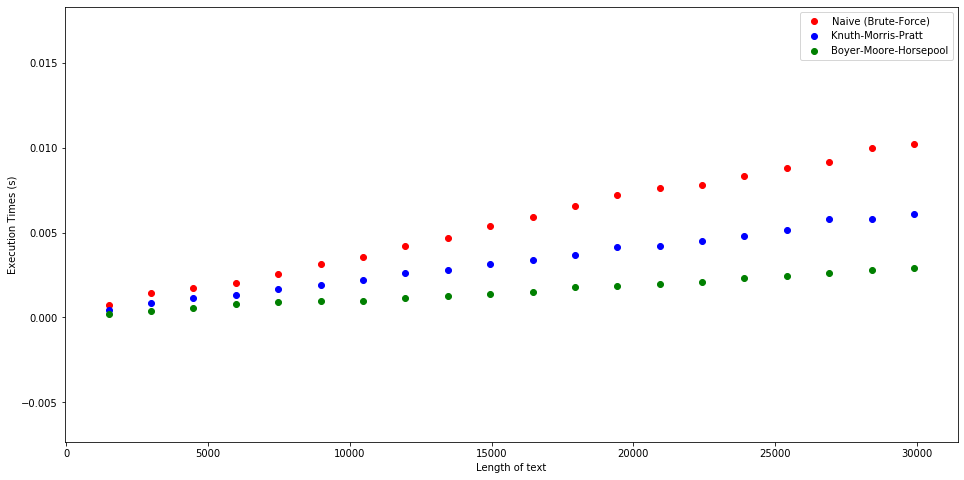

In [15]:
# plot the execution time against length of text for both KMP and Naive

f, ax = plt.subplots(figsize=(16, 8))
plt.scatter(lengthsOfText, naiveExecutionTimes, color='red', label='Naive (Brute-Force)')
plt.scatter(lengthsOfText, kmpExecutionTimes, color='blue', label='Knuth-Morris-Pratt')
plt.scatter(lengthsOfText, bmhExecutionTimes, color='green', label='Boyer-Moore-Horsepool')

plt.xlabel('Length of text')
plt.ylabel('Execution Times (s)')
plt.legend()

In [16]:
# change pattern and dna sequence dataset 

fnaFile = open('DnaData/GCF_000023605.1_ASM2360v1_genomic.fna')
dnaSequence = ''.join(fnaFile.readlines()[1:])
dnaSequence = dnaSequence.replace('\n', '')

pattern = 'ATCAGGCTA'

In [17]:
increment = len(dnaSequence) // 20
lengthsOfText = []
for i in range(1, 21):
    if i == 20:
        lengthsOfText.append(len(dnaSequence))
    else:
        lengthsOfText.append(i * increment)

In [18]:
# analysis for Naive (Brute-Force) algorithm

# run the search process for 10 times, then take the average, for each length of text
naiveExecutionTimes = []
for idx, length in enumerate(lengthsOfText):
    t = Timer(lambda: naiveStringMatcher(dnaSequence[:length], pattern)) 
    executionTime = t.timeit(number=NUM_OF_TIMES) / NUM_OF_TIMES
    
    print("Length of text: " + str(length) + ", Average Execution Time: " + str(executionTime))
    
    naiveExecutionTimes.append(executionTime)

Length of text: 243145, Average Execution Time: 0.08159972700000254
Length of text: 486290, Average Execution Time: 0.1640764119000096
Length of text: 729435, Average Execution Time: 0.24475506119999862
Length of text: 972580, Average Execution Time: 0.3322189527000091
Length of text: 1215725, Average Execution Time: 0.4177698000999953
Length of text: 1458870, Average Execution Time: 0.4966638934000002
Length of text: 1702015, Average Execution Time: 0.5716213733999893
Length of text: 1945160, Average Execution Time: 0.6557532793000064
Length of text: 2188305, Average Execution Time: 0.7381753986000149
Length of text: 2431450, Average Execution Time: 0.8278858841000101
Length of text: 2674595, Average Execution Time: 0.899391343100001
Length of text: 2917740, Average Execution Time: 0.9743467094999915
Length of text: 3160885, Average Execution Time: 1.0746517971000003
Length of text: 3404030, Average Execution Time: 1.1589794640000037
Length of text: 3647175, Average Execution Time: 1.

In [19]:
# analysis for Knuth-Morris-Pratt (KMP) algorithm

# run the search process for 10 times, then take the average, for each length of text
kmpExecutionTimes = []
for idx, length in enumerate(lengthsOfText):
    t = Timer(lambda: kmpStringMatcher(dnaSequence[:length], pattern)) 
    executionTime = t.timeit(number=NUM_OF_TIMES) / NUM_OF_TIMES
    
    print("Length of text: " + str(length) + ", Average Execution Time: " + str(executionTime))
    
    kmpExecutionTimes.append(executionTime)

Length of text: 243145, Average Execution Time: 0.04698772169999756
Length of text: 486290, Average Execution Time: 0.09079413239999212
Length of text: 729435, Average Execution Time: 0.141388192300019
Length of text: 972580, Average Execution Time: 0.18550643590001528
Length of text: 1215725, Average Execution Time: 0.23256327429999146
Length of text: 1458870, Average Execution Time: 0.27666677530000927
Length of text: 1702015, Average Execution Time: 0.32802339150000537
Length of text: 1945160, Average Execution Time: 0.37303678690000197
Length of text: 2188305, Average Execution Time: 0.41971822140001225
Length of text: 2431450, Average Execution Time: 0.47897617019998506
Length of text: 2674595, Average Execution Time: 0.5232626168000024
Length of text: 2917740, Average Execution Time: 0.5571493920999956
Length of text: 3160885, Average Execution Time: 0.6098185597000111
Length of text: 3404030, Average Execution Time: 0.6697738632999972
Length of text: 3647175, Average Execution T

In [20]:
# analysis for Boyer-Moore-Horsepool (BMH) algorithm

# run the search process for 10 times, then take the average, for each length of text
bmhExecutionTimes = []
for idx, length in enumerate(lengthsOfText):
    t = Timer(lambda: boyerMooreHorspoolStringMatcher(dnaSequence[:length], pattern)) 
    executionTime = t.timeit(number=NUM_OF_TIMES) / NUM_OF_TIMES
    
    print("Length of text: " + str(length) + ", Average Execution Time: " + str(executionTime))
    
    bmhExecutionTimes.append(executionTime)

Length of text: 243145, Average Execution Time: 0.07391791039999589
Length of text: 486290, Average Execution Time: 0.14453282719998697
Length of text: 729435, Average Execution Time: 0.21850188109999635
Length of text: 972580, Average Execution Time: 0.2925654185999974
Length of text: 1215725, Average Execution Time: 0.3649720307000052
Length of text: 1458870, Average Execution Time: 0.4337619853999968
Length of text: 1702015, Average Execution Time: 0.5062814573000196
Length of text: 1945160, Average Execution Time: 0.5758845659000145
Length of text: 2188305, Average Execution Time: 0.6689530818999856
Length of text: 2431450, Average Execution Time: 0.7544545514999982
Length of text: 2674595, Average Execution Time: 0.8182573195000031
Length of text: 2917740, Average Execution Time: 0.8958528152999861
Length of text: 3160885, Average Execution Time: 0.9961462019999999
Length of text: 3404030, Average Execution Time: 1.0868128486999922
Length of text: 3647175, Average Execution Time: 

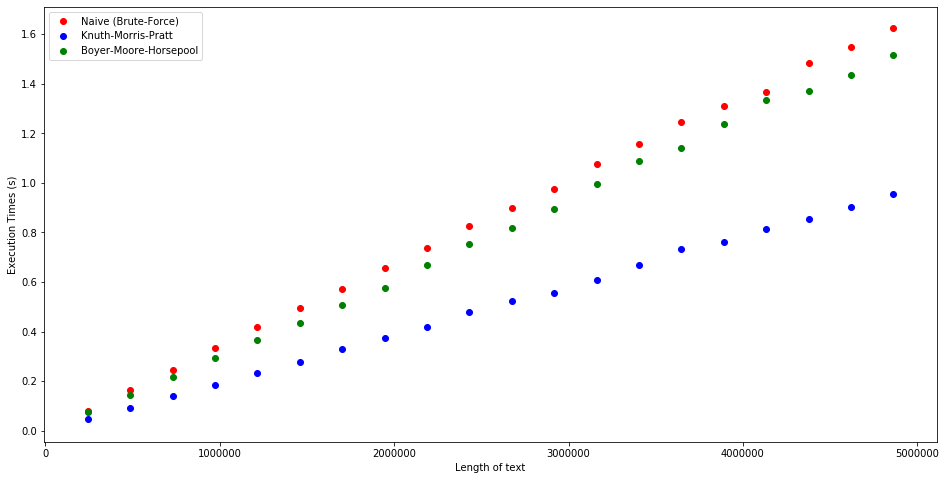

In [23]:
# plot the execution time against length of text for both KMP and Naive

f, ax = plt.subplots(figsize=(16, 8))
plt.scatter(lengthsOfText, naiveExecutionTimes, color='red', label='Naive (Brute-Force)')
plt.scatter(lengthsOfText, kmpExecutionTimes, color='blue', label='Knuth-Morris-Pratt')
plt.scatter(lengthsOfText, bmhExecutionTimes, color='green', label='Boyer-Moore-Horsepool')

plt.xlabel('Length of text')
plt.ylabel('Execution Times (s)')
plt.legend()